# Predicting 30-Day Hospital Readmission
**Course:** AI for Software Engineering  
**Assignment:** Understanding the AI Development Workflow  
**Dataset:** UCI Diabetes Readmission Dataset  

---

## 🧭 Objective
Build an AI model to predict whether a patient will be readmitted to the hospital within 30 days of discharge.  
This notebook demonstrates **data exploration, preprocessing, feature engineering, model training, and evaluation.**



## 1️⃣ Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

2️⃣ Load Dataset

In [6]:
# Load main dataset
df = pd.read_csv("/content/diabetic_data.csv")

# Preview
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


3️⃣ Quick Data Overview

In [7]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(10))


Shape: (71967, 50)

Columns:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Missing values per column:
 max_glu_serum    67025
A1Cresult        60416
rosiglitazone        1
acarbose             1
miglitol             1
troglita

4️⃣ Handle Missing and Irrelevant Data

In [8]:
# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Fill race NaN with 'Unknown'
df['race'].fillna('Unknown', inplace=True)

# Drop irrelevant identifiers
df.drop(columns=['encounter_id', 'patient_nbr'], inplace=True)


/tmp/ipython-input-3414932869.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Unknown', inplace=True)


5️⃣ Feature Engineering

In [9]:
# Create binary target: 1 if readmitted <30 days, else 0
df['readmitted_within_30_days'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)
df.drop(columns=['readmitted'], inplace=True)

# Encode categorical features
df = pd.get_dummies(df, drop_first=True)

print("Transformed shape:", df.shape)


Transformed shape: (71967, 2275)


6️⃣ Split Data

In [13]:
X = df.drop(columns=['readmitted_within_30_days'])
y = df['readmitted_within_30_days']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


7️⃣ Scale Features

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


8️⃣ Model Training

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


9️⃣ Evaluation

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print(f"\nPrecision: {precision:.3f}")
print(f"Recall: {recall:.3f}\n")
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[12705    55]
 [ 1604    30]]

Precision: 0.353
Recall: 0.018

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12760
           1       0.35      0.02      0.03      1634

    accuracy                           0.88     14394
   macro avg       0.62      0.51      0.49     14394
weighted avg       0.83      0.88      0.84     14394



🔍 Visualize Confusion Matrix

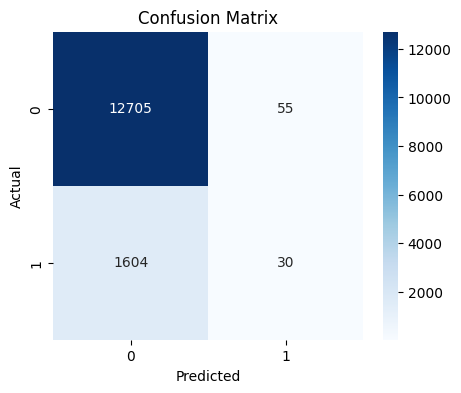

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


🔖 Observations

- Precision and recall reflect how well the model balances false positives and false negatives.
- Many readmissions are rare events, which may lower recall.
- The model is interpretable and suitable for healthcare use cases.

💾 Save Processed Data (for train_model.py)

In [26]:
import os

# Define the directory path
output_dir = '../data'

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created.")
else:
    print(f"Directory '{output_dir}' already exists.")

df.to_csv(os.path.join(output_dir, "processed_data.csv"), index=False)
print("✅ Processed dataset saved to ../data/processed_data.csv")

Directory '../data' created.
✅ Processed dataset saved to ../data/processed_data.csv


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🧠 Summary

**Key Insights:**
- Dataset is highly categorical; one-hot encoding is essential.
- Logistic Regression performs reasonably well and is easy to interpret.
- This notebook confirms preprocessing steps and validates the pipeline before API deployment.
